In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv', dtype='unicode')

In [6]:
# data.describe()

In [11]:
data.info()
# data.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29983 entries, 0 to 29982
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   crawl_timestamp               29983 non-null  object
 1   job_title                     29983 non-null  object
 2   company_name                  29983 non-null  object
 3   city                          29983 non-null  object
 4   state                         29983 non-null  object
 5   country                       29974 non-null  object
 6   post_date                     29983 non-null  object
 7   job_description               29983 non-null  object
 8   job_type                      29751 non-null  object
 9   inferred_salary_time_unit     29983 non-null  object
 10  company_description           0 non-null      object
 11  salary_offered                4127 non-null   object
 12  job_board                     29983 non-null  object
 13  geo             

In [16]:
data["job_title"].value_counts().head()

Retail Merchandiser           375
Amazon Picker/Packer          206
Amazon Warehouse Worker       197
Amazon Order Picker           195
Amazon Warehouse Associate    175
Name: job_title, dtype: int64

### Which job title was posted the most times?      
Retail Merchandiser 375

In [15]:
data["company_name"].value_counts().head()

Amazon Fulfillment         7501
GPAC                        924
LanguageLine Solutions      872
Lowe's Home Improvement     861
CDL Career Now              545
Name: company_name, dtype: int64

### Which company posted the most amount of jobs?  
    Amazon Fulfillment 7501

In [14]:
data.groupby("company_name")["post_date"].count().sort_values(ascending = False).head()

company_name
Amazon Fulfillment         7501
GPAC                        924
LanguageLine Solutions      872
Lowe's Home Improvement     861
CDL Career Now              545
Name: post_date, dtype: int64

### Which city offered the most jobs?

In [17]:
data.groupby("city")["post_date"].count().sort_values(ascending = False).head()

city
Boston        262
Chicago       218
Charlotte     216
Cincinnati    212
Portland      211
Name: post_date, dtype: int64

### Ans : Boston 262

### Which state offered the most jobs?

In [18]:
data.groupby("state")["post_date"].count().sort_values(ascending = False).head()

state
CA    2772
NJ    1862
MA    1688
PA    1599
TX    1593
Name: post_date, dtype: int64

### Ans : CA 2772

<AxesSubplot:>

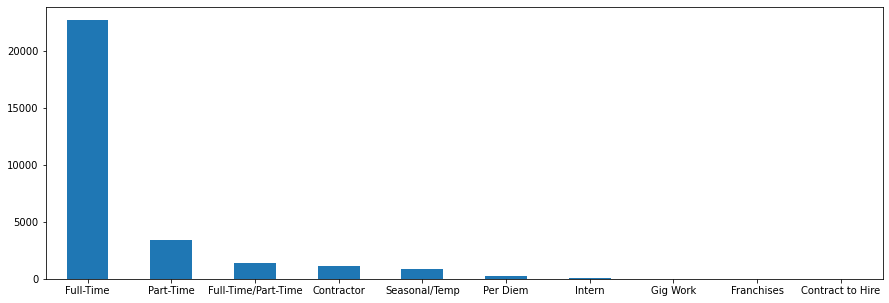

In [35]:
df = data['job_type'].value_counts()
df
df.plot(kind='bar', figsize=(15,5), rot=0)